Imports

In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Make the original data and plot it

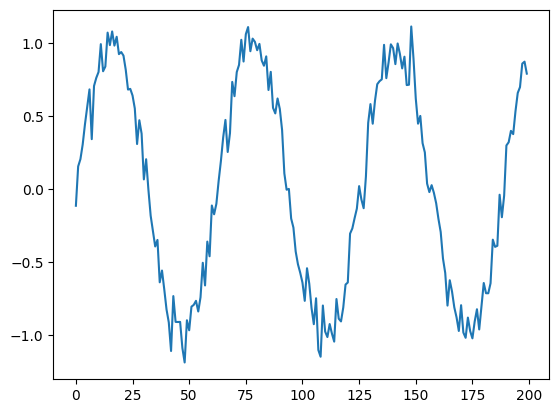

In [ ]:
#                                       adding noise
series = np.sin(0.1 * np.arange(200)) + np.random.randn(200) * 0.1

plt.plot(series);

Build the dataset

Let's see if we can use T past values to predict the next values

In [ ]:
T = 10
X = []
Y = []
for t in range(len(series) - T):
  X.append(series[t:t+T])
  Y.append(series[t+T])

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (190, 10) X.shape (190, 10)


Try autoregressive linear model

In [ ]:
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.1)
)

Train the RNN

In [ ]:
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:])
)

Epoch 1/80
3/3 [==============================] - 1s 296ms/step - loss: 0.2025 - val_loss: 0.1010
Epoch 2/80
3/3 [==============================] - 0s 63ms/step - loss: 0.0968 - val_loss: 0.0814
Epoch 3/80
3/3 [==============================] - 0s 63ms/step - loss: 0.0661 - val_loss: 0.0706
Epoch 4/80
3/3 [==============================] - 0s 39ms/step - loss: 0.0656 - val_loss: 0.0588
Epoch 5/80
3/3 [==============================] - 0s 34ms/step - loss: 0.0598 - val_loss: 0.0858
Epoch 6/80
3/3 [==============================] - 0s 41ms/step - loss: 0.0536 - val_loss: 0.0560
Epoch 7/80
3/3 [==============================] - 0s 40ms/step - loss: 0.0483 - val_loss: 0.0430
Epoch 8/80
3/3 [==============================] - 0s 36ms/step - loss: 0.0372 - val_loss: 0.0439
Epoch 9/80
3/3 [==============================] - 0s 29ms/step - loss: 0.0342 - val_loss: 0.0429
Epoch 10/80
3/3 [==============================] - 0s 35ms/step - loss: 0.0344 - val_loss: 0.0410
Epoch 11/80
3/3 [===========

Plot loss per iteration

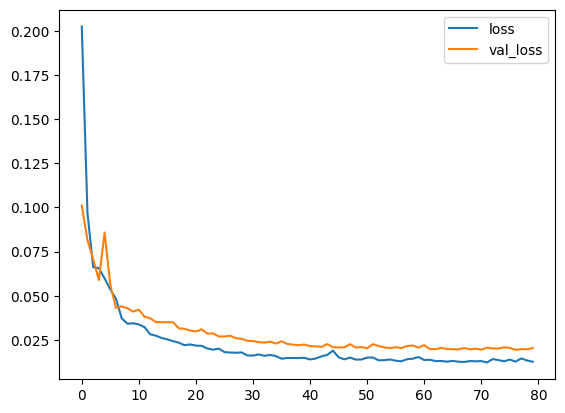

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

"WRONG" forecast using true targets

In [ ]:
validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N // 2
while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0, 0] # 1x1 array -> scalar
  i += 1
  validation_predictions.append(p)

1/1 [==============================] - 0s 23ms/step


Plot the predictions of the forecast

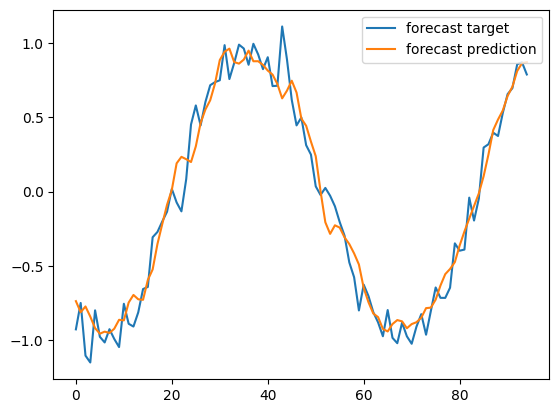

In [ ]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend();

Forecast future values (use only self-predictions for making future predictions)

In [ ]:
validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0, 0] # 1x1 array -> scalar
  validation_predictions.append(p)

  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p


1/1 [==============================] - 0s 26ms/step


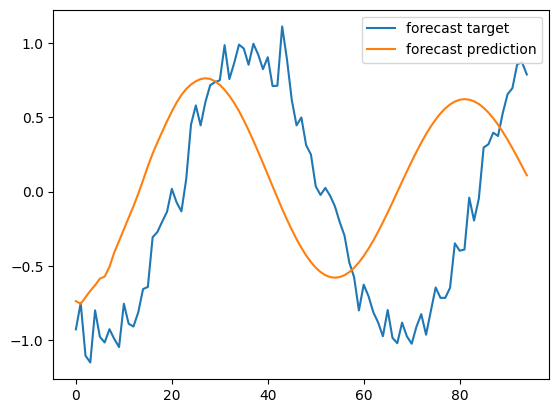

In [ ]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend();